In [26]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


In [27]:
d_long <- read.csv("resp_base_run.tsv", sep="\t")
names(d_long)[names(d_long) == "reso"] 
d_long


character(0)

resp,run,prob_id,time,phase,repetition,trial_type,condition,age,sex,group
<dbl>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
-1.30,1,3,0.00,-1,0,pause,pause,23,M,Musik
3.31,1,5,0.00,-1,0,pause,pause,25,M,Musik
-3.68,1,6,0.00,-1,0,pause,pause,27,M,Musik
-1.45,1,7,0.00,-1,0,pause,pause,24,F,Sound
-0.18,1,8,0.00,-1,0,pause,pause,27,M,Sound
-4.50,1,9,0.00,-1,0,pause,pause,30,M,Sound
1.74,1,11,0.00,-1,0,pause,pause,23,F,Musik
-0.62,1,12,0.00,-1,0,pause,pause,21,F,Sound
-1.18,1,13,0.00,-1,0,pause,pause,22,F,Sound


In [28]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$eda <- as.numeric(d_long$resp)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

In [29]:
#round(eda)
#apply(is.na(d_long_new), 2, which)

In [30]:
which(is.na(d_long_new), arr.ind = TRUE)
d_long_new = na.omit(d_long_new)

row,col


In [31]:
summary(d_long_new)

      resp               run         prob_id       time          phase      
 Min.   :-13.2100   Min.   :1.0   Min.   : 3.00   1_0:   0   Min.   :0.000  
 1st Qu.: -1.3200   1st Qu.:1.0   1st Qu.:10.50   1_1:3936   1st Qu.:1.000  
 Median :  0.4200   Median :1.5   Median :16.50   1_2:3912   Median :3.000  
 Mean   :  0.4508   Mean   :1.5   Mean   :16.67   2_0:   0   Mean   :3.498  
 3rd Qu.:  2.1900   3rd Qu.:2.0   3rd Qu.:23.25   2_1:3936   3rd Qu.:6.000  
 Max.   : 14.0500   Max.   :2.0   Max.   :29.00   2_2:3912   Max.   :7.000  
   repetition     trial_type           condition         age        sex     
 Min.   :1.000   Length:15696       math    :7872   Min.   :21.00   F:6540  
 1st Qu.:1.000   Class :character   pause   :   0   1st Qu.:23.00   M:9156  
 Median :1.000   Mode  :character   rotation:7824   Median :24.00           
 Mean   :1.498                                      Mean   :24.08           
 3rd Qu.:2.000                                      3rd Qu.:25.00           

Test assumptions

In [32]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(resp)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

time,condition,group,type,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1_1,math,Musik,relax,resp,0.9956264,1.423749e-01
1_1,math,Sound,relax,resp,0.9957345,2.604688e-01
1_1,rotation,Musik,relax,resp,0.9826028,5.455666e-06
1_1,rotation,Sound,relax,resp,0.9557437,2.197355e-10
1_1,math,Musik,stress,resp,0.9959708,1.916000e-01
1_1,math,Sound,stress,resp,0.9724543,1.655295e-07
1_1,rotation,Musik,stress,resp,0.9718527,1.362906e-08
1_1,rotation,Sound,stress,resp,0.9937397,5.939464e-02
1_2,math,Musik,relax,resp,0.9953006,1.069510e-01


      resp               run         prob_id       time          phase      
 Min.   :-13.2100   Min.   :1.0   Min.   : 3.00   1_0:   0   Min.   :0.000  
 1st Qu.: -1.3200   1st Qu.:1.0   1st Qu.:10.50   1_1:3936   1st Qu.:1.000  
 Median :  0.4200   Median :1.5   Median :16.50   1_2:3912   Median :3.000  
 Mean   :  0.4508   Mean   :1.5   Mean   :16.67   2_0:   0   Mean   :3.498  
 3rd Qu.:  2.1900   3rd Qu.:2.0   3rd Qu.:23.25   2_1:3936   3rd Qu.:6.000  
 Max.   : 14.0500   Max.   :2.0   Max.   :29.00   2_2:3912   Max.   :7.000  
   repetition     trial_type           condition         age        sex     
 Min.   :1.000   Length:15696       math    :7872   Min.   :21.00   F:6540  
 1st Qu.:1.000   Class :character   pause   :   0   1st Qu.:23.00   M:9156  
 Median :1.000   Mode  :character   rotation:7824   Median :24.00           
 Mean   :1.498                                      Mean   :24.08           
 3rd Qu.:2.000                                      3rd Qu.:25.00           

In [33]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(eda ~ group)
# not given, we need to correct the results.

run,phase,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,-1,1,4150,40.4665677,2.216669e-10
1,0,1,982,15.4539414,9.047213e-05
1,1,1,982,19.7783251,9.688717e-06
1,2,1,982,56.3082987,1.386061e-13
1,3,1,982,0.5615920,4.537990e-01
1,4,1,958,11.6656260,6.633856e-04
1,5,1,982,28.9166791,9.444507e-08
1,6,1,982,30.2574741,4.825744e-08
1,7,1,982,50.3912698,2.412590e-12


In [34]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [35]:
#model1 <- aov_ez("prob_id", # Variable/column defining your participants
#       "eda", # dv
#       d_long, # name of your dataframe
#       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
#       within = c("time", "condition", "type"), 
#       include_aov = TRUE)
#
#
#model1
#summary(model1)

In [36]:
# with pause excluded

model1 <- aov_ez("prob_id", # Variable/column defining your participants
                 "resp", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE, na.rm=TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: resp
                          Effect          df   MSE         F   ges p.value
1                          group       1, 20  2.06      2.95  .007    .102
2                            sex       1, 20  2.06      0.61  .001    .445
3                      group:sex       1, 20  2.06      0.27 <.001    .611
4                           time 1.94, 38.81  2.04    4.98 *  .022    .013
5                     group:time 1.94, 38.81  2.04      0.50  .002    .604
6                       sex:time 1.94, 38.81  2.04      1.27  .006    .292
7                 group:sex:time 1.94, 38.81  2.04      0.21 <.001    .803
8                      condition       1, 20  4.49    3.39 +  .017    .081
9                group:condition       1, 20  4.49      1.36  .007    .258
10                 sex:condition       1, 20  4.49      0.40  .002    .536
11           group:sex:condition       1, 20  4.49      0.63  .003    .437
12                          type       1, 20 14.15 46.30 

Warning message in summary.Anova.mlm(object$Anova, multivariate = FALSE):
“HF eps > 1 treated as 1”



Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                              Sum Sq num Df Error SS den Df F value    Pr(>F)
(Intercept)                    75.80      1   41.278     20 36.7254 6.349e-06
group                           6.08      1   41.278     20  2.9464  0.101519
sex                             1.25      1   41.278     20  0.6068  0.445131
group:sex                       0.55      1   41.278     20  0.2669  0.611102
time                           19.75      3   79.302     60  4.9804  0.003758
group:time                      1.99      3   79.302     60  0.5010  0.683031
sex:time                        5.03      3   79.302     60  1.2682  0.293429
group:sex:time                  0.84      3   79.302     60  0.2123  0.887514
condition                      15.20      1   89.779     20  3.3868  0.080608
group:condition                 6.09      1   89.779     20  1.3573  0.257715
sex:condition                   1.78      1   89.779     20  0.3965  0.53604

In [57]:
typeof(summary)


[1] "closure"

In [60]:
model1$anova_table

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
group,1.000000,20.00000,2.063889,2.94638203,0.0070143616,1.015193e-01
sex,1.000000,20.00000,2.063889,0.60675716,0.0014525789,4.451308e-01
group:sex,1.000000,20.00000,2.063889,0.26687392,0.0006394174,6.111019e-01
time,1.940379,38.80759,2.043472,4.98044771,0.0224255650,1.254173e-02
group:time,1.940379,38.80759,2.043472,0.50098663,0.0023022385,6.042416e-01
sex:time,1.940379,38.80759,2.043472,1.26818483,0.0058073537,2.920257e-01
group:sex:time,1.940379,38.80759,2.043472,0.21227926,0.0009768060,8.032078e-01
condition,1.000000,20.00000,4.488933,3.38681576,0.0173540772,8.060789e-02
group:condition,1.000000,20.00000,4.488933,1.35729409,0.0070278731,2.577150e-01


# post hoc tests:

In [38]:
m1_ph <- emmeans(model1, "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 type   emmean    SE df lower.CL upper.CL
 relax  -0.878 0.146 20    -1.18   -0.574
 stress  1.783 0.258 20     1.25    2.320

Results are averaged over the levels of: group, sex, condition, time 
Confidence level used: 0.95 

 contrast       estimate    SE df t.ratio p.value
 relax - stress    -2.66 0.391 20  -6.805  <.0001

Results are averaged over the levels of: group, sex, condition, time 

In [39]:
m3_ph <- emmeans(model1, "group", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m3_ph
pairs(m3_ph)

type = relax:
 group emmean    SE df lower.CL upper.CL
 Musik -1.232 0.200 20   -1.650  -0.8150
 Sound -0.524 0.213 20   -0.967  -0.0805

type = stress:
 group emmean    SE df lower.CL upper.CL
 Musik  2.394 0.353 20    1.657   3.1303
 Sound  1.173 0.375 20    0.390   1.9548

Results are averaged over the levels of: sex, condition, time 
Confidence level used: 0.95 

type = relax:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound   -0.709 0.292 20  -2.428  0.0248

type = stress:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound    1.221 0.515 20   2.371  0.0279

Results are averaged over the levels of: sex, condition, time 

In [40]:
m2_ph <- emmeans(model1, "time", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m2_ph
pairs(m2_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

type = relax:
 time emmean    SE df lower.CL upper.CL
 X1_1 -0.222 0.227 20   -0.696    0.252
 X1_2 -1.009 0.186 20   -1.396   -0.622
 X2_1 -1.029 0.177 20   -1.398   -0.660
 X2_2 -1.252 0.232 20   -1.737   -0.767

type = stress:
 time emmean    SE df lower.CL upper.CL
 X1_1  1.904 0.256 20    1.370    2.439
 X1_2  1.500 0.306 20    0.863    2.138
 X2_1  1.832 0.365 20    1.070    2.594
 X2_2  1.896 0.264 20    1.346    2.447

Results are averaged over the levels of: group, sex, condition 
Confidence level used: 0.95 

type = relax:
 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2  0.78722 0.274 20   2.875  0.0427
 X1_1 - X2_1  0.80693 0.248 20   3.252  0.0192
 X1_1 - X2_2  1.02995 0.208 20   4.951  0.0004
 X1_2 - X2_1  0.01971 0.210 20   0.094  0.9997
 X1_2 - X2_2  0.24273 0.260 20   0.935  0.7865
 X2_1 - X2_2  0.22302 0.230 20   0.970  0.7676

type = stress:
 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2  0.40390 0.208 20   1.942  0.2430
 X1_1 - X2_1  0.07195 0.263 20   0.274  0.9926
 X1_1 - X2_2  0.00799 0.203 20   0.039  1.0000
 X1_2 - X2_1 -0.33195 0.267 20  -1.244  0.6071
 X1_2 - X2_2 -0.39592 0.253 20  -1.563  0.4208
 X2_1 - X2_2 -0.06397 0.314 20  -0.204  0.9969

Results are averaged over the levels of: group, sex, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [41]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run1wdh = c(1, -1, 1, -1)
        # this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m2_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

type = relax:
 contrast   estimate    SE df t.ratio p.value
 run1vsrun2    1.050 0.298 20   3.527  0.0042
 run1wdh       1.010 0.294 20   3.439  0.0042

type = stress:
 contrast   estimate    SE df t.ratio p.value
 run1vsrun2   -0.324 0.322 20  -1.007  0.6520
 run1wdh       0.340 0.348 20   0.976  0.6520

Results are averaged over the levels of: group, sex, condition 
P value adjustment: holm method for 2 tests 

plots

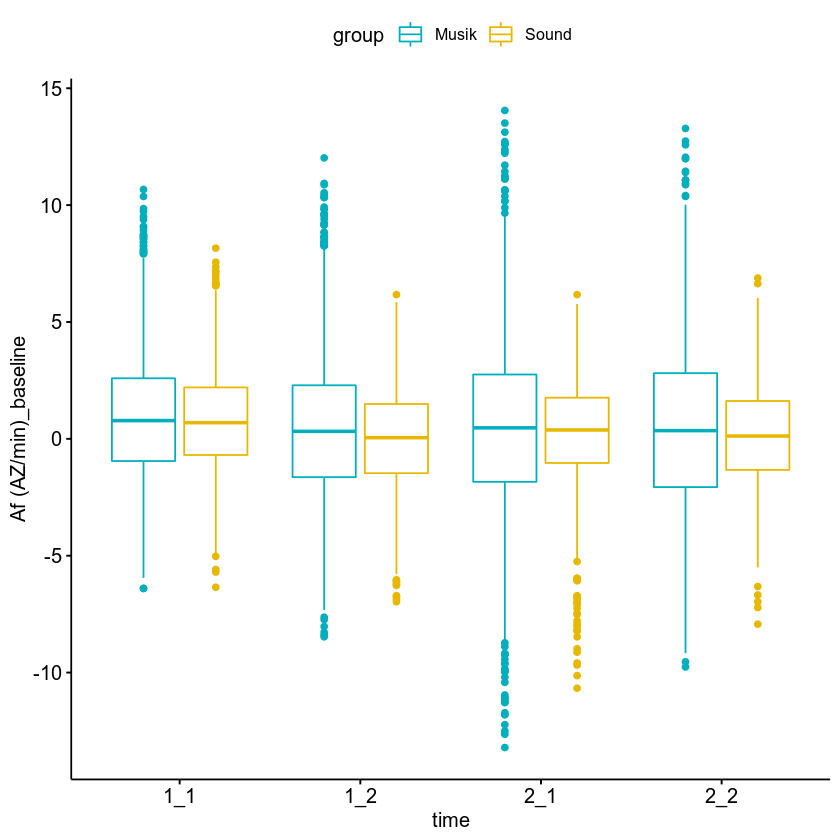

In [42]:
p_resp0 <- ggboxplot(
  d_long_new, x = "time", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_resp0

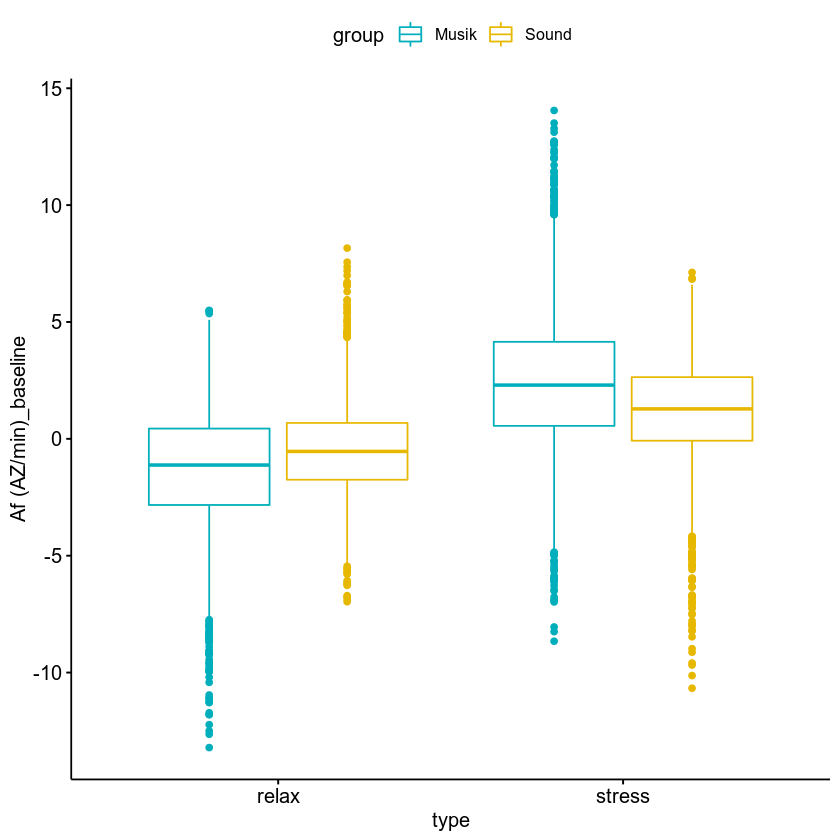

In [43]:
p_resp8 <- ggboxplot(
  d_long_new, x = "type", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_resp8

png 
  2

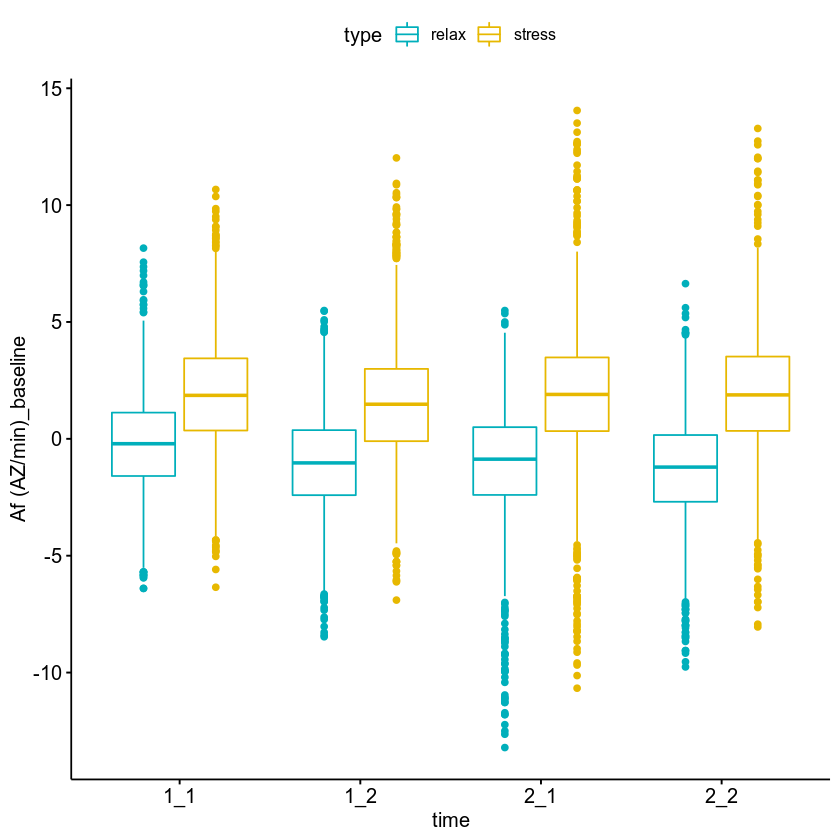

In [44]:
p_resp1 <- ggboxplot(
  d_long_new, x = "time", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  color = "type", palette = c("#00AFBB", "#E7B800")
)
p_resp1

png("plot8.png")
plot(p_resp1)
dev.off()


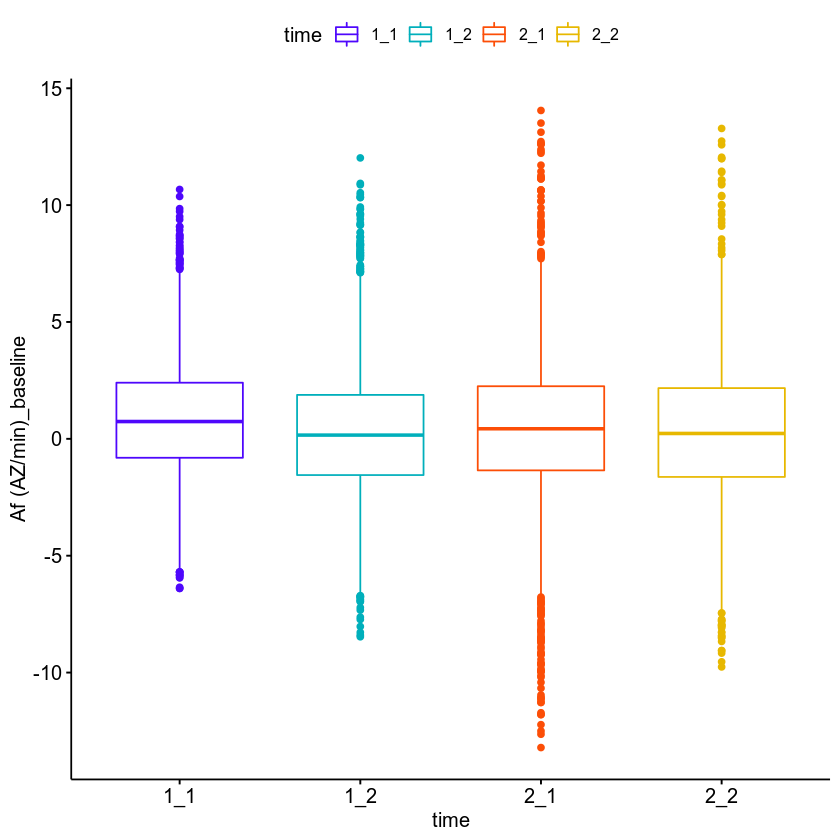

In [45]:
p_resp2 <- ggboxplot(
  d_long_new, x = "time", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  palette = c("#4e07fc","#00AFBB", "#FC4E07", "#E7B800" ), color = "time", shape = "time"
)
p_resp2


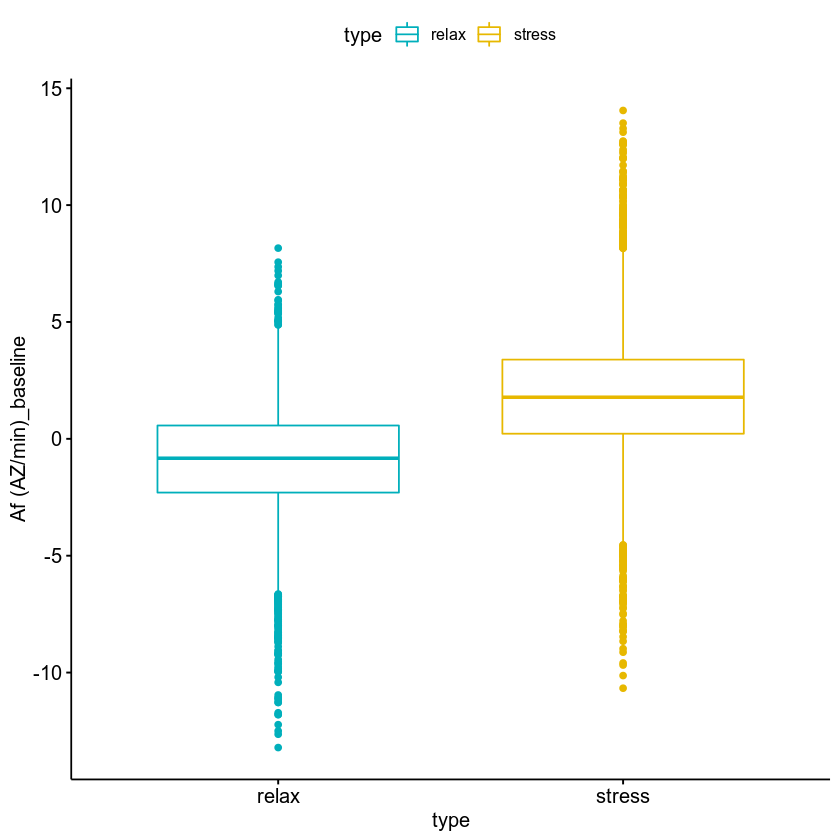

In [46]:
p_resp3 <- ggboxplot(
  d_long_new, x = "type", y = "resp" ,ylab= "Af (AZ/min)_baseline", 
  palette = c("#00AFBB", "#E7B800"), color = "type", shape = "type"
)
p_resp3

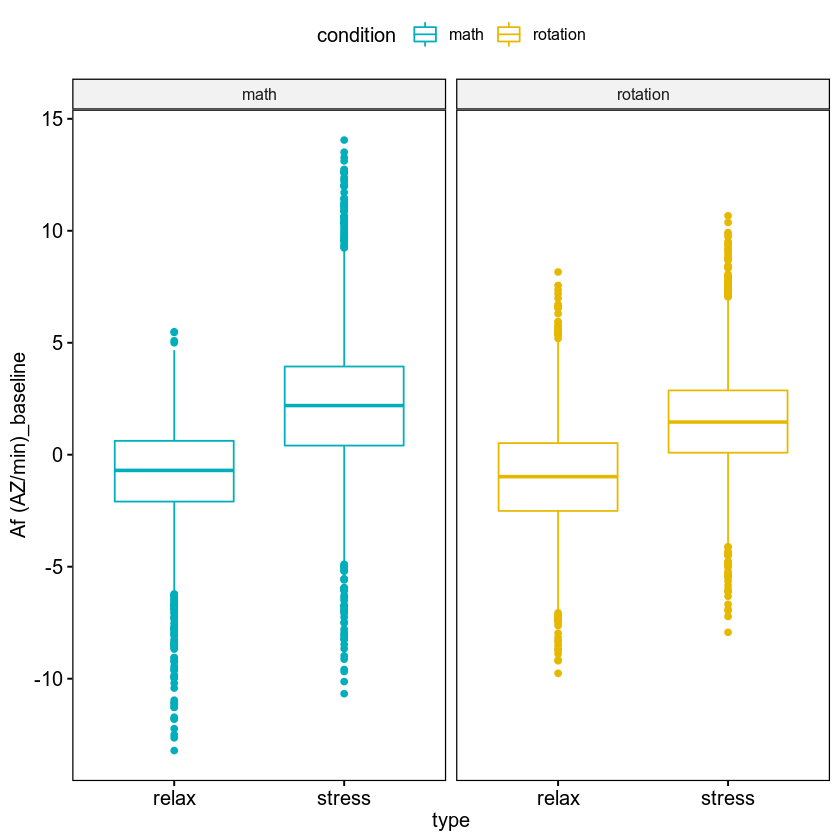

In [47]:
p_resp4  <- ggboxplot(
  d_long_new, x = "type", y = "resp", facet.by = "condition", ylab= "Af (AZ/min)_baseline", 
  color = "condition", palette = c("#00AFBB", "#E7B800")
)
p_resp4

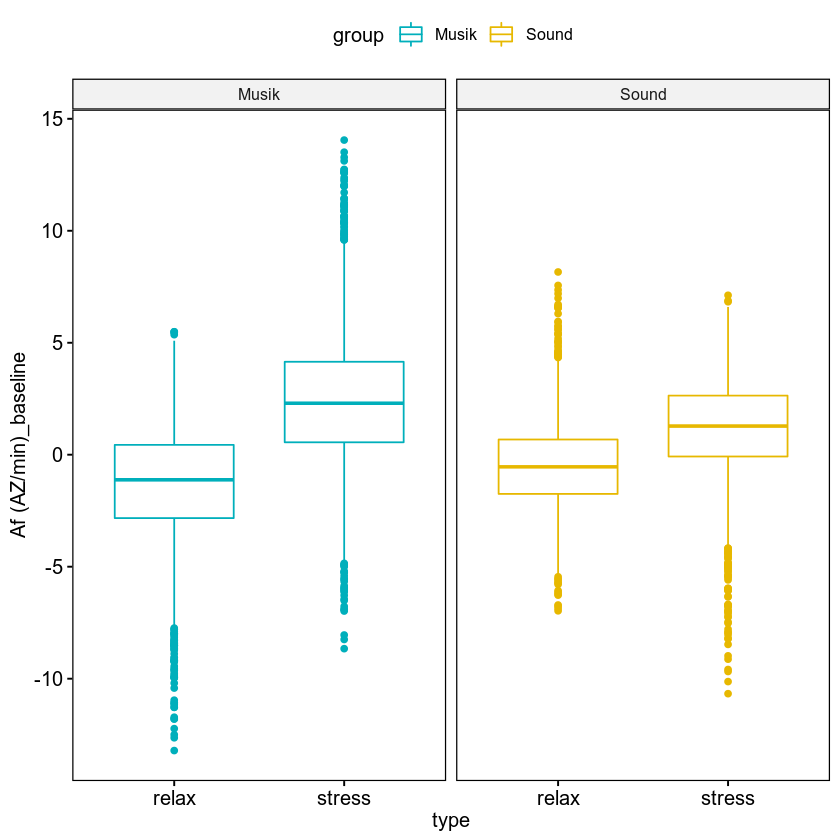

In [48]:
p_resp5  <- ggboxplot(
  d_long_new, x = "type", y = "resp", facet.by = "group", ylab= "Af (AZ/min)_baseline",
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_resp5

In [49]:
# PNG device


png("plot1.png")
plot(p_resp1)
dev.off()

png("plot2.png")
plot(p_resp2)
dev.off()

png("plot3.png")
plot(p_resp3)
dev.off()

png("plot4.png")
plot(p_resp4)
dev.off()

png("plot5.png")
plot(p_resp5)
dev.off()

png("plot6.png")
plot(p_resp0)
dev.off()

png("plot7.png")
plot(p_resp8)
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2